# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


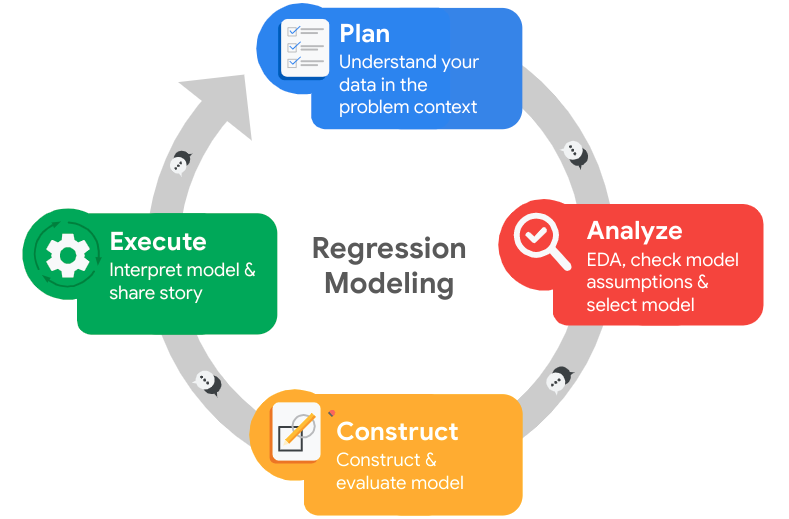

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. The stakeholders in this case are the HR department at Salisfort Motors, the employees of Salisfort, the Salisfort management, the data analytics team working on the project and the Salisfort shareholders.
2. Our goal is to create a model which helps retain employees at Salisfort, resulting in lower costs, ending up with higher profit.
3. At first glance I would assume that the satisfaction level is going to be the main driver in our model.
4. I'm using stackoverflow and ChatGPT to help me with completing this project. Links: https://chat.openai.com/
https://stackoverflow.com/
5. Ethical considerations include: Data privacy, Informed consent, Security of data

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

# Basic
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# Data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics and functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'years_at_company',
                          'Department': 'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'years_at_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
years_at_company         0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [9]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df0 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df0.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

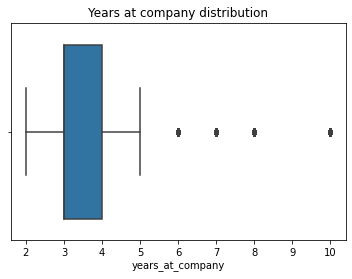

In [10]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(data = df0, x='years_at_company')
plt.title('Years at company distribution')
plt.show()

In [11]:
# Determine the number of rows containing outliers
per25 = df0['years_at_company'].quantile(0.25)
per75 = df0['years_at_company'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = per75 - per25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df0[(df0['years_at_company'] > upper_limit) | (df0['years_at_company'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in 'years_at_company':", len(outliers))


Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in 'years_at_company': 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [12]:
# Get numbers of people who left vs. stayed
left = len(df0[df0['left'] == 1])
stayed = len(df0[df0['left'] == 0])
print('Left the company:',left)
print('Did not leave the company:',stayed)
# Get percentages of people who left vs. stayed
print('Left rate', left/(left+stayed), '%' )

Left the company: 1991
Did not leave the company: 10000
Left rate 0.1660411975648403 %


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [13]:
df0.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<function matplotlib.pyplot.show(*args, **kw)>

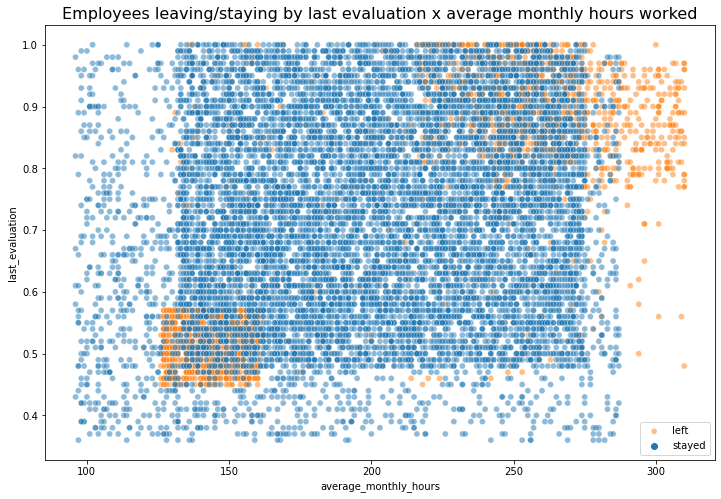

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df0, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'left', alpha = 0.5 )
plt.legend(labels=['left', 'stayed'])
plt.title('Employees leaving/staying by last evaluation x average monthly hours worked', fontsize = '16')
plt.show

Employees that work long hours and get a high rating seem to leave the company at a higher rate. Maybe they feel unappreciated because their salary doesn't reflect their efforts?
Lets see the salaries of employees working over 200 hours with a rating over 0.75.

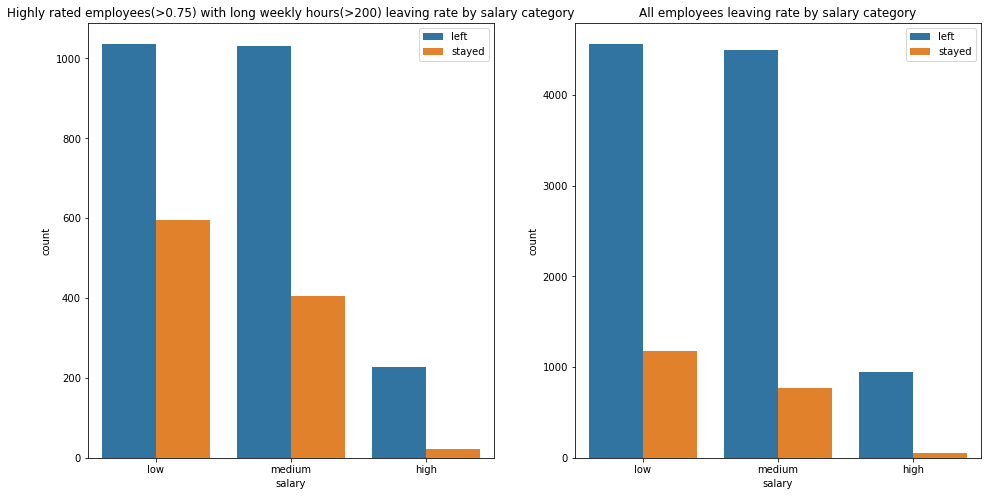

In [15]:
df1 = df0[(df0['average_monthly_hours'] > 200) & (df0['last_evaluation'] >= 0.75)]
fig, axes = plt.subplots(1,2, figsize=(16,8))
sns.countplot(data=df1, x = 'salary', hue = 'left', order=['low', 'medium', 'high'], ax = axes[0])
sns.countplot(data=df0, x = 'salary', hue = 'left', order=['low', 'medium', 'high'], ax = axes[1])
axes[0].legend(labels=['left', 'stayed'])
axes[1].legend(labels=['left', 'stayed'])
axes[0].set_title('Highly rated employees(>0.75) with long weekly hours(>200) leaving rate by salary category')
axes[1].set_title('All employees leaving rate by salary category')
plt.show()

It seems like the high working hour, highly rated employees are not satisfied with low and medium salaries.

<function matplotlib.pyplot.show(*args, **kw)>

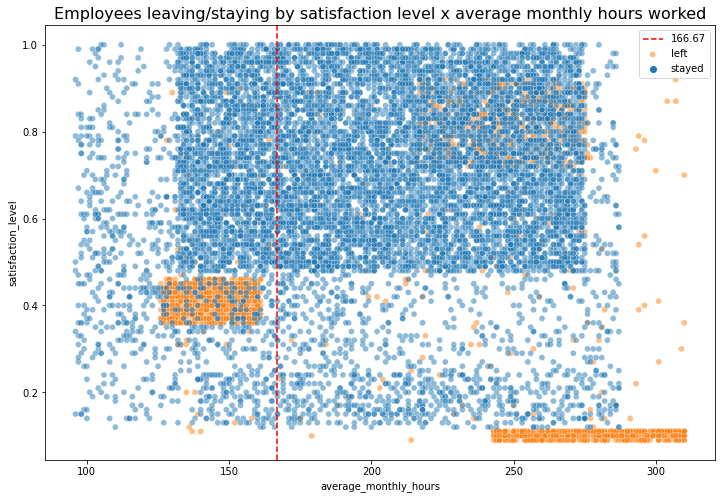

In [16]:
# satisfaction_level x salary
norm_work_hours = 50*40/12
# 166.67(with 2 weeks vacation in US)
plt.figure(figsize=(12,8))
sns.scatterplot(data = df0, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left', alpha = 0.5)
plt.axvline(x=norm_work_hours, color = 'red', label = '166.67', ls = '--')
plt.legend(labels=['166.67', 'left', 'stayed'])
plt.title('Employees leaving/staying by satisfaction level x average monthly hours worked', fontsize = '16')
plt.show

Text(0.5, 1.0, 'Monthly hours by promotion last 5 years')

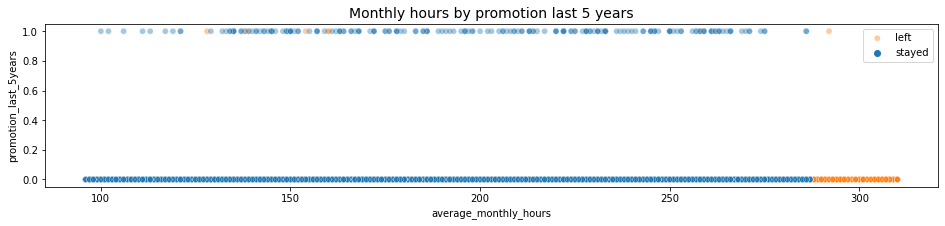

In [17]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df0, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.legend(labels=['left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14')

Promotion doesnt seem to affect employees leaving too much.

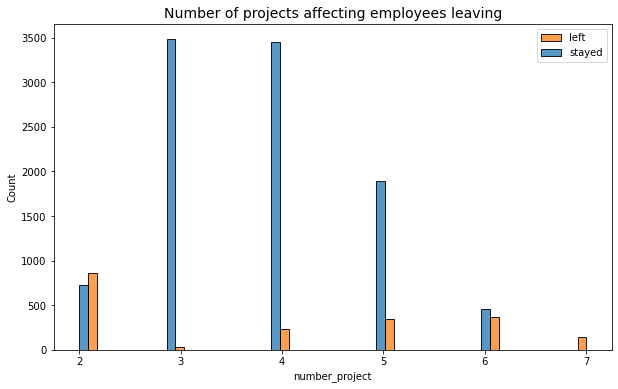

In [18]:
# number_project x left
plt.figure(figsize=(10,6))
sns.histplot(data=df0, x='number_project', hue='left', multiple = 'dodge')
plt.legend(labels=['left', 'stayed'])
plt.title('Number of projects affecting employees leaving', fontsize=14)
plt.show()

Employees having too few projects seem to be an issue as people with only 2 projects are likely to leave.
It seems over 2 projects the higher the project amount on an employee, the likelier for them to leave.

Text(0.5, 1.0, 'Correlation Heatmap')

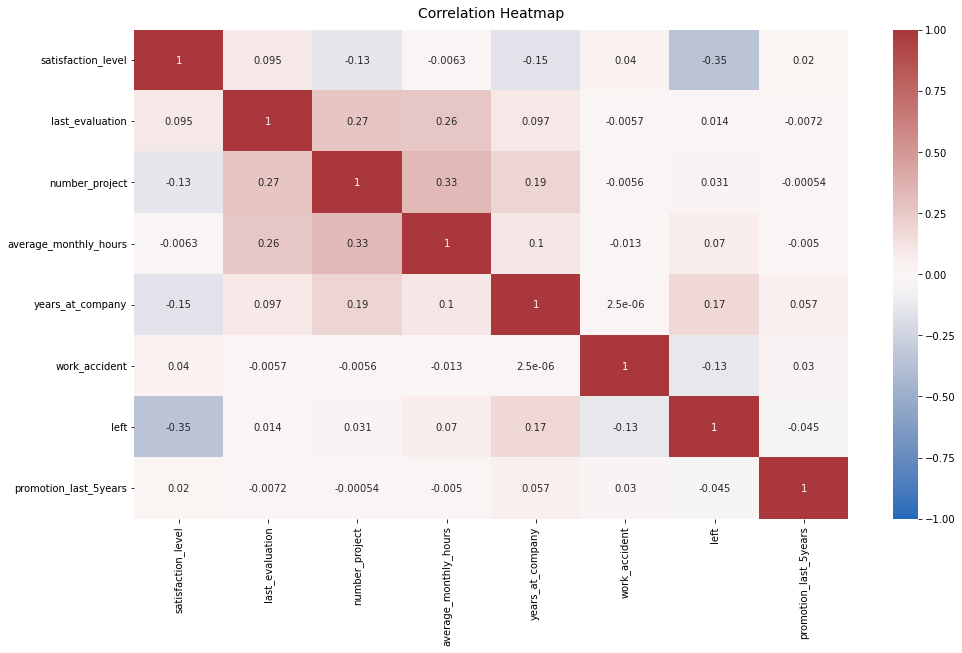

In [19]:
# heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

Seems like evaluation, hours worked and number of projects are mildly correlated.
Satisfaction level is correlated with employees leaving.

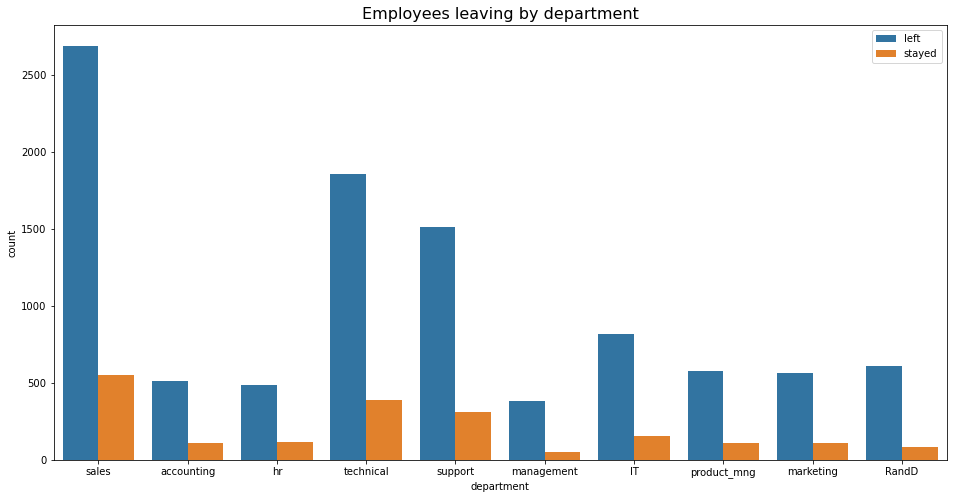

In [20]:
plt.figure(figsize=(16,8))
sns.countplot(data=df0, x = 'department', hue = 'left')
plt.legend(labels=['left', 'stayed'])
plt.title('Employees leaving by department', fontsize=16)
plt.show()

Department doesn't seem to affect the employees leaving, the ratio looks the same for every department at first glance.


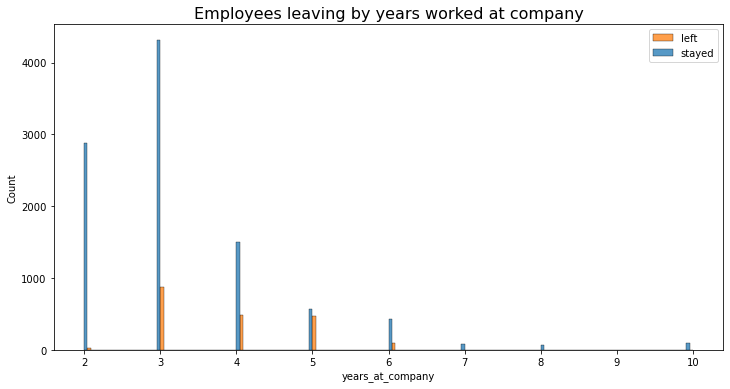

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(data=df0, x='years_at_company', hue='left', multiple='dodge')
plt.title('Employees leaving by years worked at company', fontsize=16)
plt.legend(labels=['left', 'stayed'])
plt.show()

As we already understood from the assignment it seems that employees leave after a few years, thats why theres so few people in the company working there for more than 6 years. These people are more contempt with their positions.

### Insights

It seem like low satisfaction levels, high working hours and too many or too few projects seem to be the main drivers when examining the employees leaving the companies. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Our goal is to identify employees who might be leaving the company before they actually do. It is a binary classification task, as the outcome variable is the 'left' variable which can be 0 or 1, left and didn't leave, respectfully.

### Identify the types of models most appropriate for this task.

Based on the dataset and the outcome variable the best approach would be a logistical regression model or a tree based machine learning model. I am going to continue with a Random Forest tree based model.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [25]:
df_mod = df0.copy()

df_mod = pd.get_dummies(df_mod, drop_first = False)

In [26]:
y = df_mod['left']

X = df_mod.drop('left', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [29]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1, 3, 5],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [300, 500],
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

In [30]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 10min 54s, sys: 1.54 s, total: 10min 56s
Wall time: 10min 58s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [31]:
rf1.best_score_

0.9496589381720429

In [32]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

In [33]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    
    preds = model.best_estimator_.predict(X_test_data)

    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy]
                         })
  
    return table

In [34]:
rf_scores = get_scores('Random Forest Model', rf1, X_test, y_test)
rf_scores

,model,precision,recall,f1,accuracy
0,Random Forest Model,0.984085,0.932161,0.957419,0.986244


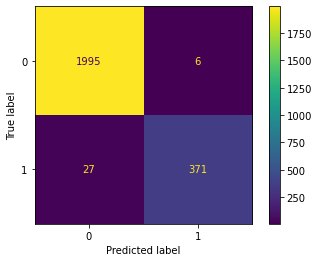

In [35]:
preds = rf1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_)
disp.plot(values_format='')

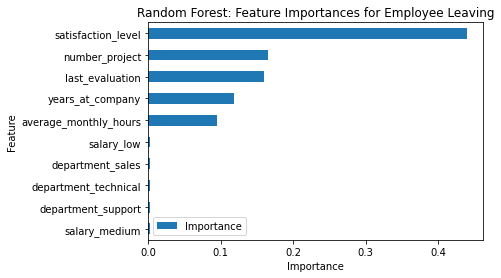

In [37]:
feat_impt = rf1.best_estimator_.feature_importances_

ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

feat = X.columns[ind]

feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results
The test results are the following for our Random Forest Classifier model:
precision: 0.984085	recall: 0.932161 f1: 0.957419 accuracy: 0.986244.
It seems like the model performed really well on our test data in most aspects.

### Conclusion, Recommendations, Next Steps

Conclusion:

As we can see from the feature importance, the main drivers of employees leaving or staying are: satisfaction level, number of projects, last evaluation, years at the company, and average monthly hours.

Our model shows that most of our assumptions at the EDA stage were based.

Recommendations:

* Monitor the satisfaction level of employees and communicate with them about why it is low or high to gain more insight.
* Make sure employees don't work on too many or too few projects at the same time.
* Rework the evaluation system.
* In the EDA, it was visible that employees who were at the company for 3-5 years were the ones leaving at the biggest rate. A remedy for this could be a clear career program, which offers opportunities to progress careers after being at the company for a certain time.
* Overworking seems to be a big problem as well. The company should consider assessing this problem with either rewarding employees better for longer hours or making working overtime an option.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.